In [68]:
import json
import pandas as pd
from rapidfuzz import process

# Import JSON file
#f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/affs/RES_aff_output_1971_1979.json')
#f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE/JPE_affiliation_output_1940_2010_1_3095.json')
#f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE/JPE_affiliation_output_1940_2010_3096_4326.json')
#f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE/JPE_affiliation_output_1940_2010.json')
f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/QJE/QJE_aff_ref_output_1977_2010.json')
json_data = json.load(f)

# Define Journal and Dataframe
Journal_Name = 'QJE'
Reference_Data_List = []

# Extract Json Data into dataframe
for key1, value1 in json_data.items():
    Article_ID = key1
    content_type = value1["content_type"]
    author_list = value1["authors"]
    authorsNo = len(author_list)
    stable_url = value1["stable_url"]
    for key2 in value1["affiliations"]:
        Ref_type = key2
        if key2 == "found":
            ref_string = value1["affiliations"][key2]

    Reference_Data_List.append({'Journal_Name' : Journal_Name,
    'Authors_count' : authorsNo, 
    'Article_ID' : Article_ID, 'content_type' : content_type,
    'stable_url' : stable_url, 
    'Ref_type': Ref_type,  'ref_string':ref_string })

#RES_2000_2009 = pd.DataFrame.from_records(Reference_Data_List)     
#RES_2000_2009.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/RES_2000_2009.xlsx') 
QJE_aff_ref_output_1977_2010 = pd.DataFrame.from_records(Reference_Data_List)     
QJE_aff_ref_output_1977_2010.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/Working files/QJE_aff_ref_output_1977_2010.xlsx')        

In [69]:
affs = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/Unique Universities.xlsx')
print(affs.shape)

#testdata = JPE_1940_2010.loc[0:20].reset_index(drop = True)
testdata = QJE_aff_ref_output_1977_2010

for i in range(len(affs)):
    #Replaceing title case and stripping leading space
    affs.iat[i,0] = affs.iat[i,0].strip().title()
Affiliation_choices = affs['Affilliation'].values.tolist()

for i in range(len(testdata)):
    #Replaceing title case and stripping leading space
    testdata.iat[i,6] = testdata.iat[i,6].strip().title()


(683, 5)


In [70]:
for i in range(len(testdata)):
    split = testdata.iat[i,6].split('\n\n')
    split_len = len(testdata.iat[i,6].split('\n\n'))
    affiliations = []
    count_no_aff = 0
    for j in range(split_len):
        #print(i)
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) > 0:
            affiliations = affiliations + process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) == 0:
            count_no_aff = count_no_aff+1

        if count_no_aff == 8:
            break
        if j == split_len:
            break

    print("Length = " , len(affiliations), ", Number = ",i)
    if len(affiliations) == 0:
        testdata.loc[i,['Missing aff']] = "Missing"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 1:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 2:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 3:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 4:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 5:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
        print(affiliations)
    elif len(affiliations) == 6:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 7:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 8:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 9:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 10:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 11:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 12:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['aff12']] = affiliations[11][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    else: 
        testdata.loc[i,['Missing aff']] = "More than 12"


Length =  1 , Number =  0
Length =  4 , Number =  1
Length =  4 , Number =  2
Length =  4 , Number =  3
Length =  1 , Number =  4
Length =  2 , Number =  5
Length =  3 , Number =  6
Length =  0 , Number =  7
Length =  4 , Number =  8
Length =  3 , Number =  9
Length =  4 , Number =  10
Length =  4 , Number =  11
Length =  0 , Number =  12
Length =  0 , Number =  13
Length =  5 , Number =  14
[('Harvard University', 100.0, 114), ('Riverside Harvard University', 90.0, 451), ('Ecole Polytechnique', 90.0, 147), ('Harvard University', 100.0, 114), ('Riverside Harvard University', 90.0, 451)]
Length =  3 , Number =  15
Length =  0 , Number =  16
Length =  0 , Number =  17
Length =  1 , Number =  18
Length =  2 , Number =  19
Length =  1 , Number =  20
Length =  1 , Number =  21
Length =  3 , Number =  22
Length =  3 , Number =  23
Length =  5 , Number =  24
[('National Bureau Of Economic Research', 90.0, 602), ('University Of California, San Diego', 90.0, 593), ('National Bureau Of Economic 

In [71]:
testdata.head
testdata.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/Working files/QJE_aff_ref_output_1977_2010_affs_out.xlsx') 

In [72]:
melted = testdata.melt(id_vars= 'Article_ID', value_vars=['aff1','aff2','aff3','aff4','aff5','aff6','aff7','aff8','aff9','aff10']).dropna()
melted.rename(columns = {'variable':'Aff number'}, inplace = True)
melted.rename(columns = {'value':'Affiliation'}, inplace = True)
print(melted.head())

  Article_ID Aff number         Affiliation
0   40961010       aff1  Harvard University
1   40961011       aff1      Wharton School
2   40961012       aff1     Policy Research
3   40961013       aff1  Canadian Institute
4   40961014       aff1          World Bank


In [73]:
QJE_master = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/Master lists/Processed/QJE_processed.xlsx')

for i in range(len(QJE_master)):
    QJE_master.loc[i,['Article_ID']] = QJE_master.loc[i,['stable_url']].to_string().rsplit('/',1)[-1]

QJE_master_condenced  = QJE_master[['Article_ID','year']]
QJE_master_condenced.head()

,Article_ID,year
0,26372672,2016
1,26372673,2016
2,26372674,2016
3,26372675,2016
4,26372676,2016


In [74]:
#JPE_master.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/JPE_master.xlsx') 

In [75]:
QJE_melted_master = melted.merge(QJE_master_condenced, how = 'left', on = 'Article_ID')
QJE_melted_master = QJE_melted_master.sort_values(by=['year'])
QJE_melted_master.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/QJE_melted_master.xlsx') 
QJE_melted_master.head()

,Article_ID,Aff number,Affiliation,year
1858,1885418,aff2,University Of Virginia,1977
1863,1883144,aff2,Harvard University,1977
1191,1883142,aff1,Stanford University,1977
1190,1883141,aff1,Stanford University,1977
1189,1883140,aff1,Stanford University,1977


In [76]:
QJE_melted_master['aff_cum_counts'] = QJE_melted_master.groupby(['Affiliation']).cumcount()+1
#QJE_melted_master['aff_cum_counts'] = QJE_melted_master.groupby(['Affiliation','year']).cumcount()+1
QJE_melted_master.head()
QJE_melted_master.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES/Fuzzy matching/Combined rapidfuzz/QJE_melted_master_aff_count.xlsx') 

In [77]:
highest_vals = QJE_melted_master.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
1201,40961015,aff2,National Bureau Of Economic Research,2010,233
0,40961010,aff1,Harvard University,2010,183
1200,40961013,aff2,Massachusetts Institute Of Technology,2010,148
1213,27867491,aff2,Columbia University,2010,112
7,40961018,aff1,University Of Chicago,2010,82
1202,40961016,aff2,Princeton University,2010,74
2120,27867502,aff4,Stanford University,2010,70
31,40506280,aff1,"University Of California, Berkeley",2010,47
1205,40961020,aff2,University Of Pennsylvania,2010,43
2123,27867491,aff4,Yale University,2010,33


     Article_ID Aff number             Affiliation  year  aff_cum_counts
1858    1885418       aff2  University Of Virginia  1977               1
1863    1883144       aff2      Harvard University  1977               1
1191    1883142       aff1     Stanford University  1977               1
1190    1883141       aff1     Stanford University  1977               2
1189    1883140       aff1     Stanford University  1977               3


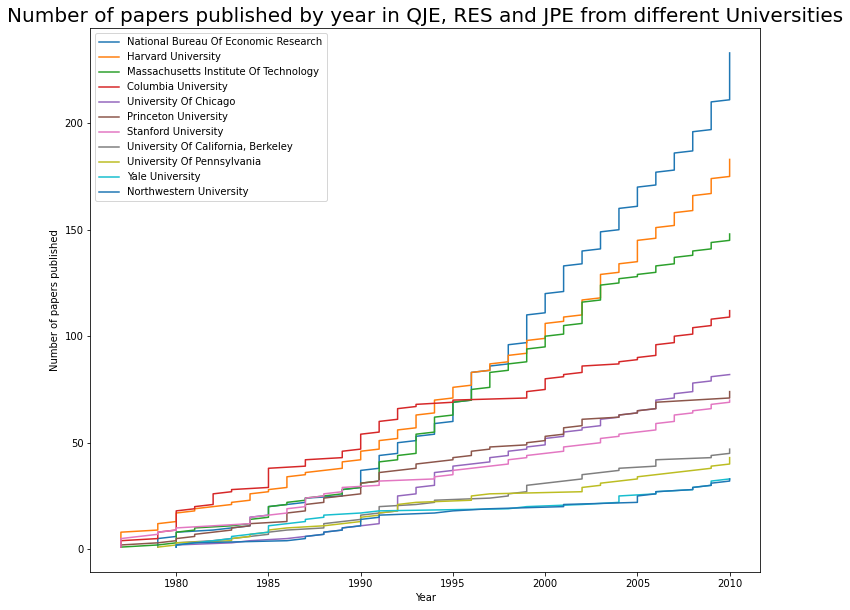

In [78]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = QJE_melted_master
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])]
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])]
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])]
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])]
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])]
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])]
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])]
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])]
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])]
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])]
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])]

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in QJE, RES and JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()